# Rossmann Store Sales



# Bibliotheken importieren



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

## Daten importieren

In [4]:
import pandas as pd
from pandas.api.types import CategoricalDtype
# pd.set_option('display.max_columns', None)

dtypes_train = {
    'Store' : 'int',
    'DayOfWeek' : 'category',
    'Sales' : 'int',
    'Customers' : 'int',
    'Open' : 'bool',
    'Promo' : 'bool',
    'StateHoliday' : 'category',
    'SchoolHoliday' : 'bool'
}
train = pd.read_csv('train.csv', parse_dates = ['Date'], dtype = dtypes_train)
# display(train.info())
# display(train.head())

dtypes_store = {
    'Store' : 'int',
    'StoreType' : 'category',
    'Assortment' : 'category',
    'CompetitionDistance' : 'object',
    'CompetitionOpenSinceMonth' : 'object',
    'CompetitionOpenSinceYear' : 'object',
    'Promo2' : 'bool',
    'Promo2SinceWeek' : 'object',
    'Promo2SinceYear' : 'object',
    'PromoInterval' : 'object'
}

store = pd.read_csv('store.csv', dtype = dtypes_store)
# display(store.info())
# display(store.head())

demand = train.merge(store, how = 'inner', on = 'Store')
demand.set_index(['Date'], inplace = True)
demand.sort_index(axis = 0, ascending = True, inplace = True)
display(demand.info())
display(demand.head())
# display(daily_demand.info())
# display(daily_demand.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int32   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int32   
 3   Customers                  1017209 non-null  int32   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Date,,,,,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,False,False,a,True,d,c,5350,NaN,NaN,True,22,2012,"Mar,Jun,Sept,Dec"
2013-01-01,746,2,0,0,False,False,a,True,d,c,4330,2,2011,True,35,2011,"Mar,Jun,Sept,Dec"
2013-01-01,171,2,0,0,False,False,a,True,a,a,2640,NaN,NaN,False,NaN,NaN,NaN
2013-01-01,694,2,0,0,False,False,a,True,a,c,460,11,2012,True,40,2014,"Jan,Apr,Jul,Oct"
2013-01-01,396,2,0,0,False,False,a,True,a,c,23130,NaN,NaN,False,NaN,NaN,NaN


# Daten vorbereiten

In [5]:
demand['StateHoliday'] = demand['StateHoliday'].replace(to_replace = ['0','a','b','c'], value = ['None', 'Public holiday', 'Easter', 'Christmas']).astype('category')
demand['Assortment'] = demand['Assortment'].replace(to_replace = ['a','b','c'], value = ['basic', 'extra', 'extended']).astype('category')
demand['DayOfWeek'] = demand['DayOfWeek'].replace(to_replace = ['1','2','3','4','5','6','7'], value = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']).astype('category')

display(demand.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype   
---  ------                     --------------    -----   
 0   Store                      1017209 non-null  int32   
 1   DayOfWeek                  1017209 non-null  category
 2   Sales                      1017209 non-null  int32   
 3   Customers                  1017209 non-null  int32   
 4   Open                       1017209 non-null  bool    
 5   Promo                      1017209 non-null  bool    
 6   StateHoliday               1017209 non-null  category
 7   SchoolHoliday              1017209 non-null  bool    
 8   StoreType                  1017209 non-null  category
 9   Assortment                 1017209 non-null  category
 10  CompetitionDistance        1014567 non-null  object  
 11  CompetitionOpenSinceMonth  693861 non-null   object  
 12  CompetitionOpenSinceYear   693861 non-nul

None

## Visualisieren & Aufbereiten

### Korrelationsdiagramme

<AxesSubplot:xlabel='SchoolHoliday', ylabel='Sales'>

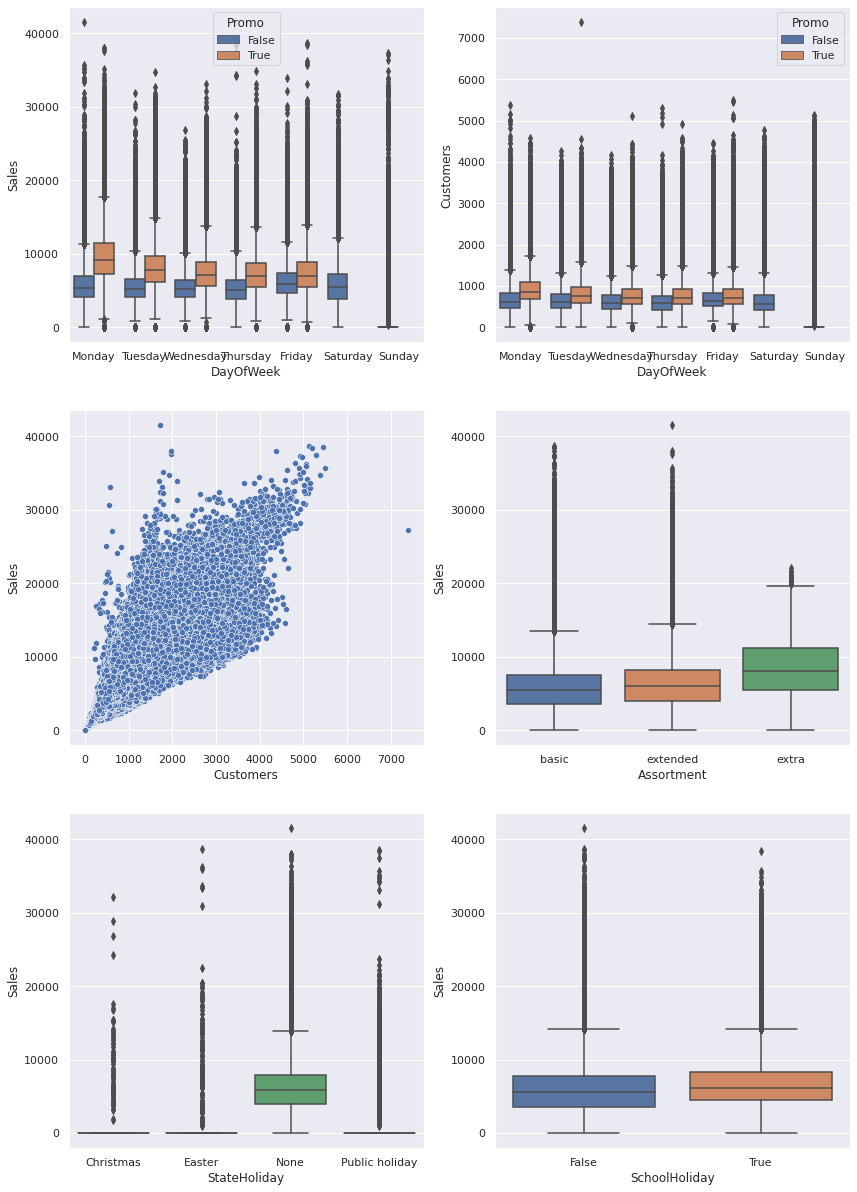

In [147]:
rows, cols = 3, 2
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(7*cols, 7*rows))
axs = axs.flatten()


sns.boxplot(x = 'DayOfWeek', y = "Sales", hue = 'Promo', data = demand, ax = axs[0], order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.boxplot(x = 'DayOfWeek', y = "Customers", hue = 'Promo', data = demand, ax = axs[1], order = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'])
sns.scatterplot(x = 'Customers', y = "Sales", data = demand, ax = axs[2])
sns.boxplot(x = 'Assortment', y = "Sales", data = demand, ax = axs[3])
sns.boxplot(x = 'StateHoliday', y = "Sales", data = demand, ax = axs[4])
sns.boxplot(x = 'SchoolHoliday', y = "Sales", data = demand, ax = axs[5])

### Transformationen und Anpassungen

### Kodierungen

In [6]:
import datetime as dt

data = demand[demand.Store == 1].copy()

# bool'sche Variablen
for col in ['Open', 'SchoolHoliday', 'Promo']:
    data[col] = data[col].replace(to_replace = [True, False], value = [1,0]).astype('int')

# kategorische Variablen
data = pd.get_dummies(data, columns = ['DayOfWeek', 'StateHoliday'], drop_first = False)

# Trend
data['Trend'] = data.index.map(dt.datetime.toordinal)


# weitere Prediktoren
# Monat
#data['Month'] = data.index.month_name()
#data = pd.get_dummies(data, columns = ['Month'], drop_first = False)

# Tag im Monat
#data['DayOfMonth'] = data.index.day
#data = pd.get_dummies(data, columns = ['DayOfMonth'], drop_first = False)

display(data.head())
display(data.info())

,Store,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,StateHoliday_Christmas,StateHoliday_Easter,StateHoliday_None,StateHoliday_Public holiday,Trend
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,0,0,0,0,1,c,basic,1270,9,...,0,0,0,1,0,0,0,0,1,734869
2013-01-02,1,5530,668,1,0,1,c,basic,1270,9,...,0,0,0,0,1,0,0,1,0,734870
2013-01-03,1,4327,578,1,0,1,c,basic,1270,9,...,0,0,1,0,0,0,0,1,0,734871
2013-01-04,1,4486,619,1,0,1,c,basic,1270,9,...,0,0,0,0,0,0,0,1,0,734872
2013-01-05,1,4997,635,1,0,1,c,basic,1270,9,...,1,0,0,0,0,0,0,1,0,734873


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2013-01-01 to 2015-07-31
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Store                        942 non-null    int32   
 1   Sales                        942 non-null    int32   
 2   Customers                    942 non-null    int32   
 3   Open                         942 non-null    int32   
 4   Promo                        942 non-null    int32   
 5   SchoolHoliday                942 non-null    int32   
 6   StoreType                    942 non-null    category
 7   Assortment                   942 non-null    category
 8   CompetitionDistance          942 non-null    object  
 9   CompetitionOpenSinceMonth    942 non-null    object  
 10  CompetitionOpenSinceYear     942 non-null    object  
 11  Promo2                       942 non-null    bool    
 12  Promo2SinceWeek              0 non-null      

None

## Modellieren und Schätzen
### Regressionsmodelle
#### Lineare Regression

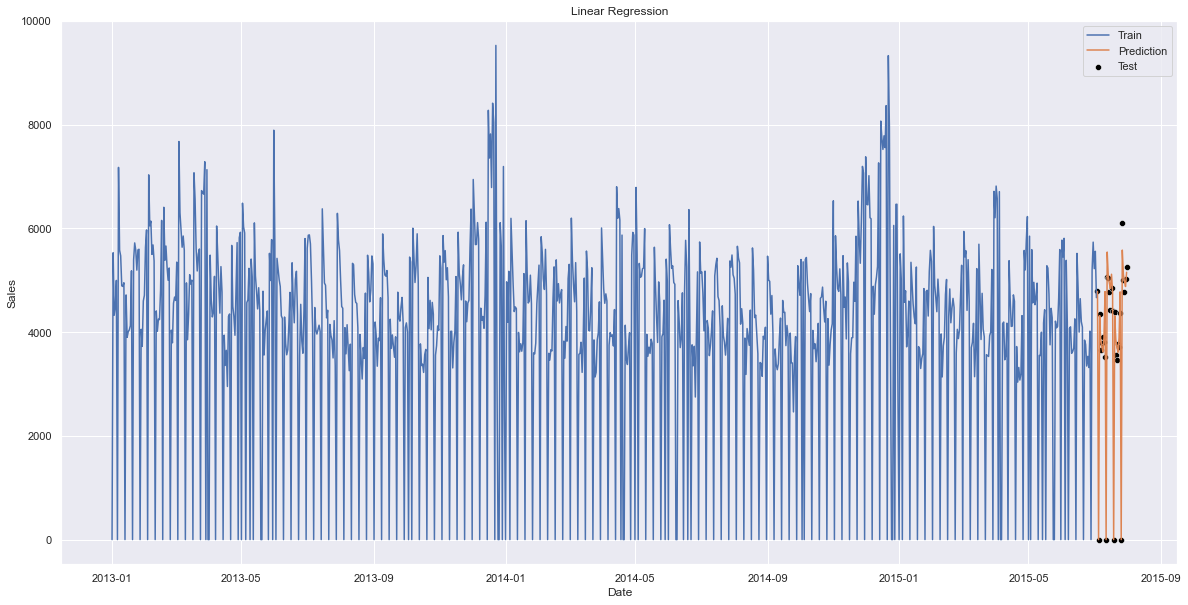

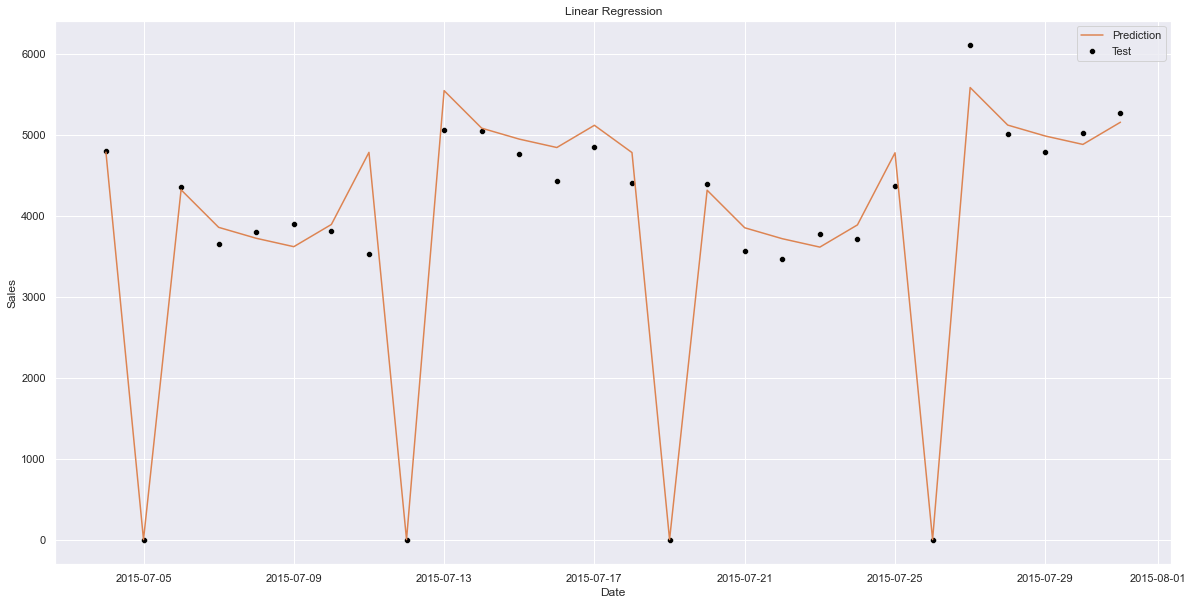

MAE:	 219.94


,Importance
Open,2660.983989
StateHoliday_None,1331.914255
DayOfWeek_Sunday,-1329.069734
Promo,1227.110460
DayOfWeek_Saturday,973.115488
StateHoliday_Easter,-941.153183
DayOfWeek_Monday,508.948964
StateHoliday_Public holiday,-486.444418
DayOfWeek_Thursday,-192.267055
StateHoliday_Christmas,95.683347


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE

x = data.drop(columns = 
              [
               'Sales',
               'Store',
               'Customers',
               'StoreType',
               'Assortment',
               'CompetitionDistance',
               'CompetitionOpenSinceMonth',
               'CompetitionOpenSinceYear',
               'Promo2',
               'Promo2SinceWeek',
               'Promo2SinceYear',
               'PromoInterval'
              ]
)

y = data[['Sales']]

#display(x)
#display(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=28, shuffle = False)

forecast = LinearRegression().fit(x_train, y_train)

prediction = pd.DataFrame(data = forecast.predict(x_test), index = pd.date_range(start = x_test.index.min(), end = x_test.index.max()))
prediction.index.name = 'Date'
prediction.columns = ['Sales']

prediction[prediction.Sales < 0] = 0

#display(prediction)

sns.lineplot(data = y_train['Sales'], label = 'Train')
sns.scatterplot(data = y_test['Sales'], color = 'black', label = 'Test')
sns.lineplot(data = prediction['Sales'], label = 'Prediction')
plt.title('Linear Regression')
plt.show()

sns.scatterplot(data = y_test['Sales'], color = 'black', label = 'Test')
sns.lineplot(data = prediction['Sales'], color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Linear Regression')
plt.show()

print('MAE:\t %4.2f' % (MAE(y_true = y_test['Sales'], y_pred = prediction['Sales'])))

# summarize feature importance
importance = pd.DataFrame(data = forecast.coef_.transpose(), index = x.columns)
importance.columns = ['Importance']
display(importance.sort_values(by='Importance', key=abs, ascending = False))

##### Variablenbedeutung & -auswahl

In [9]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

# k = len(data)
k = np.floor(len(data)/28).astype(int)

cv = KFold(n_splits = k)
# cv = TimeSeriesSplit(n_splits = 10, max_train_size = None, test_size = 28, gap = 0)

# Zusammenfassung Variablenbedeutung
importance = pd.DataFrame(data = forecast.coef_.transpose(), index = x.columns)
importance.columns = ['Importance']
display(importance.sort_values(by='Importance', key=abs, ascending = False))

# Variablenauswahl

forecast = LinearRegression()

# selector = RFECV(forecast, step = 1, cv = cv, scoring = 'neg_mean_absolute_error')
selector = SequentialFeatureSelector(forecast, n_features_to_select=10)

selector = selector.fit(x, y)

#display(selector.support_)
#display(selector.ranking_)
#display(selector.grid_scores_)

display(selector.get_support())
display(x.info())

prediction = pd.DataFrame(data = selector.predict(x_test), index = pd.date_range(start = x_test.index.min(), end = x_test.index.max()))
prediction.index.name = 'Date'
prediction.columns = ['Sales']

prediction[prediction.Sales < 0] = 0

display(prediction)
print('MAE:\t %4.2f' % (MAE(y_true = y_test['Sales'], y_pred = prediction['Sales'])))

,Importance
Open,2660.983989
StateHoliday_None,1331.914255
DayOfWeek_Sunday,-1329.069734
Promo,1227.110460
DayOfWeek_Saturday,973.115488
StateHoliday_Easter,-941.153183
DayOfWeek_Monday,508.948964
StateHoliday_Public holiday,-486.444418
DayOfWeek_Thursday,-192.267055
StateHoliday_Christmas,95.683347


array([ True,  True, False, False,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2013-01-01 to 2015-07-31
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Open                         942 non-null    int32
 1   Promo                        942 non-null    int32
 2   SchoolHoliday                942 non-null    int32
 3   DayOfWeek_Friday             942 non-null    uint8
 4   DayOfWeek_Monday             942 non-null    uint8
 5   DayOfWeek_Saturday           942 non-null    uint8
 6   DayOfWeek_Sunday             942 non-null    uint8
 7   DayOfWeek_Thursday           942 non-null    uint8
 8   DayOfWeek_Tuesday            942 non-null    uint8
 9   DayOfWeek_Wednesday          942 non-null    uint8
 10  StateHoliday_Christmas       942 non-null    uint8
 11  StateHoliday_Easter          942 non-null    uint8
 12  StateHoliday_None            942 non-null    uint8
 13  StateHoliday_Public holiday  94

None

AttributeError: 'SequentialFeatureSelector' object has no attribute 'predict'

##### Residualanalyse

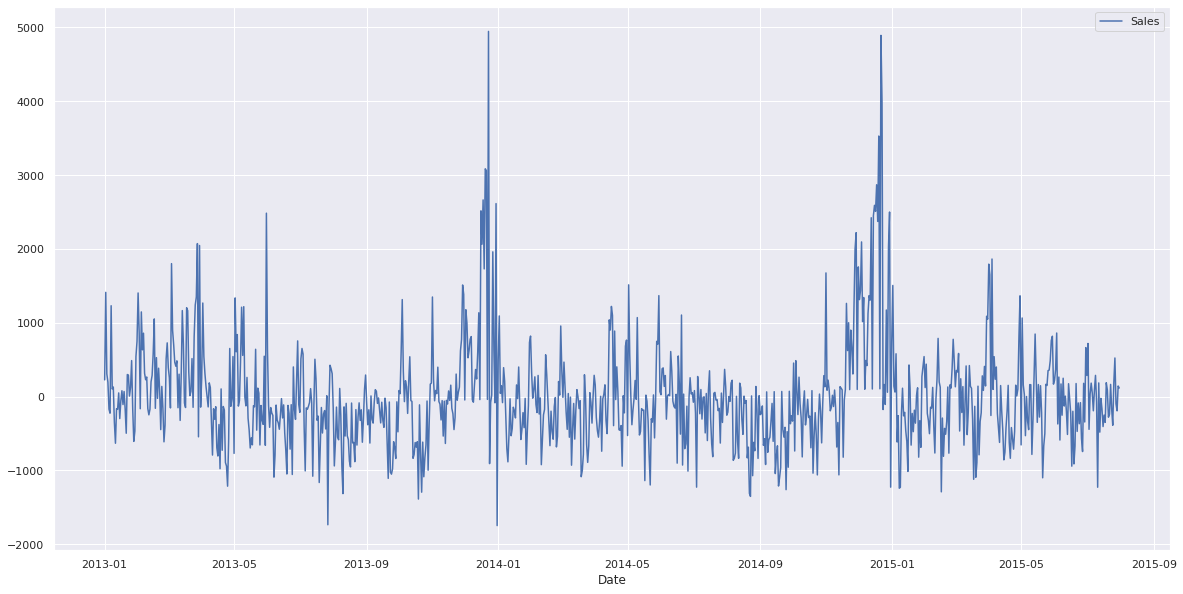

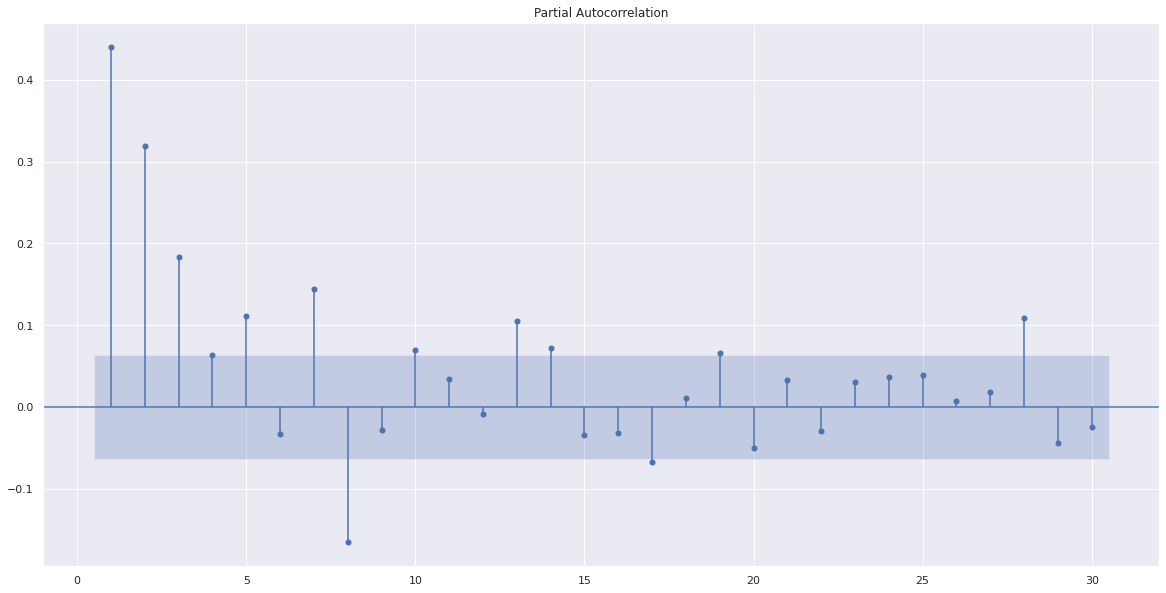

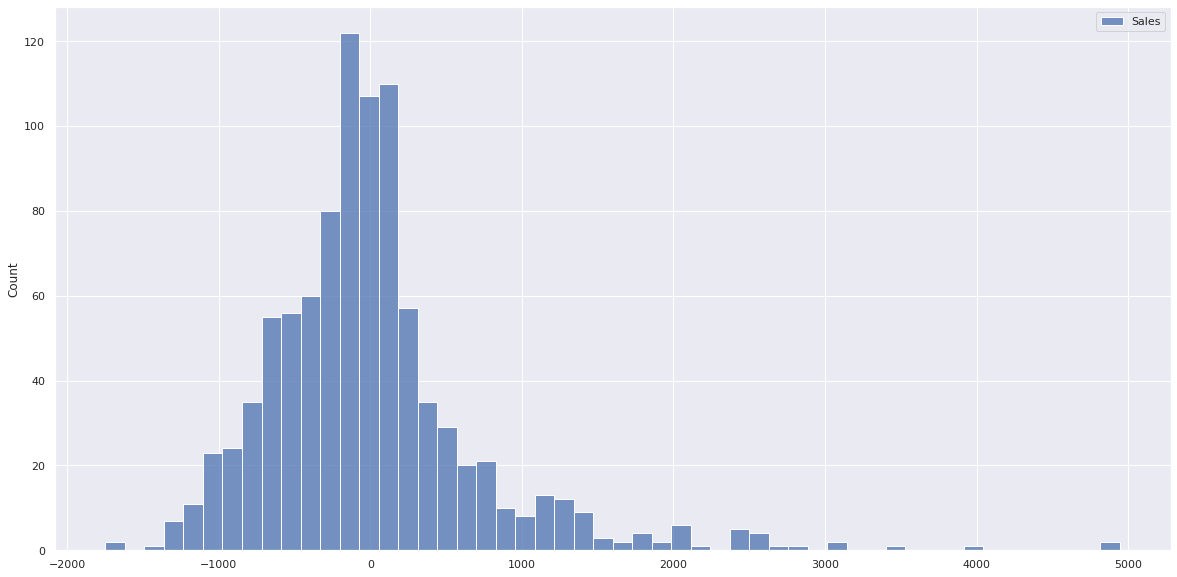

,Sales
Date,
2013-12-23,4946.131668
2014-12-22,4892.304387
2014-12-23,3989.931339
2014-12-20,3529.127594
2013-12-20,3084.985865
2013-12-21,3061.954875
2014-12-18,2869.203985
2013-12-18,2663.656879
2013-12-30,2613.884989


,Store,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,StateHoliday_Christmas,StateHoliday_Easter,StateHoliday_None,StateHoliday_Public holiday,Trend
Date,,,,,,,,,,,,,,,,,,,,,
2013-12-25,1,0,0,0,0,1,c,basic,1270,9,...,0,0,0,0,1,1,0,0,0,735227
2013-12-26,1,0,0,0,0,1,c,basic,1270,9,...,0,0,1,0,0,1,0,0,0,735228
2014-12-25,1,0,0,0,0,1,c,basic,1270,9,...,0,0,1,0,0,1,0,0,0,735592
2014-12-26,1,0,0,0,0,1,c,basic,1270,9,...,0,0,0,0,0,1,0,0,0,735593


In [151]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

forecast = LinearRegression().fit(x, y)

residuals = y - forecast.predict(x)

sns.lineplot(data = residuals)
plt.show
plot_pacf(residuals.dropna(), zero = False)
plt.show()
sns.histplot(residuals)
plt.show()

display(residuals.sort_values(by = 'Sales', ascending = False).head(20))
display(data[data.StateHoliday_Christmas == 1])

#### Random Forest

Fitting 33 folds for each of 10 candidates, totalling 330 fits


RandomForestRegressor(max_depth=7)

-467.50648599644137

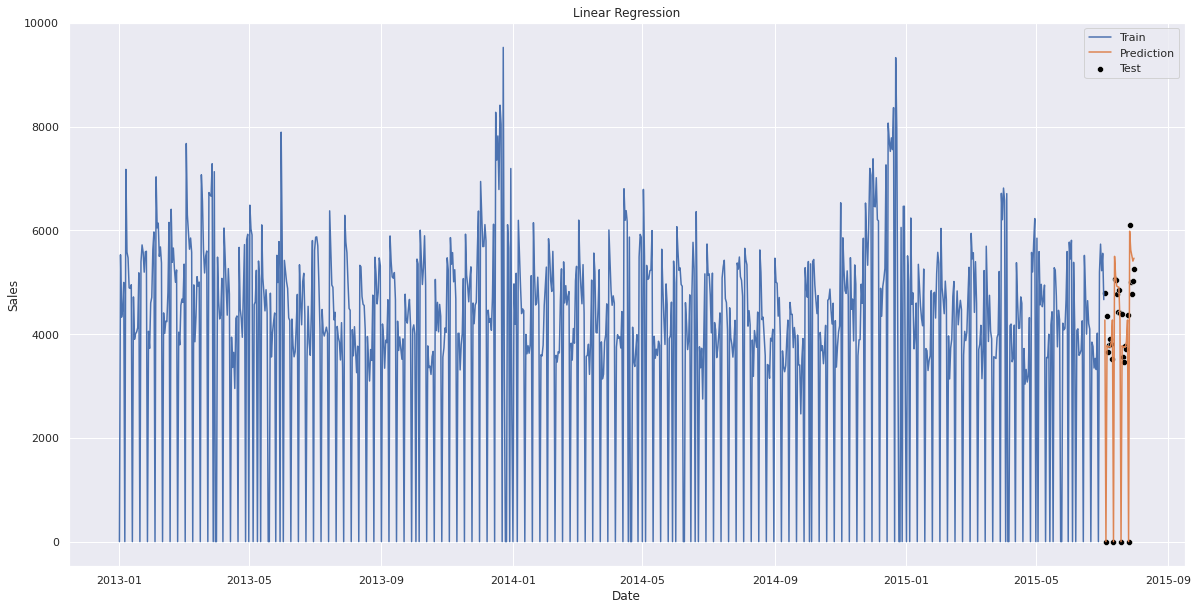

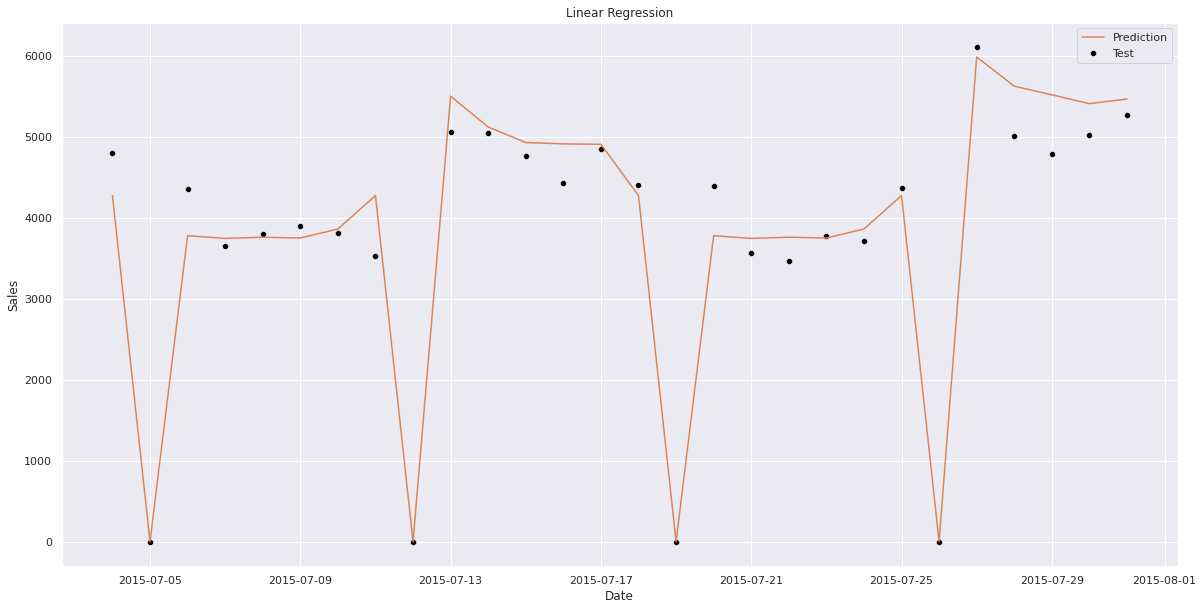

MAE:	 248.39


,Importance
Open,0.841848
Trend,0.061037
Promo,0.051424
DayOfWeek_Saturday,0.021565
DayOfWeek_Monday,0.011330
SchoolHoliday,0.007803
DayOfWeek_Friday,0.002075
DayOfWeek_Tuesday,0.001583
DayOfWeek_Thursday,0.000847
DayOfWeek_Wednesday,0.000488


In [180]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import TimeSeriesSplit
from sktime.performance_metrics.forecasting import mean_absolute_error as MAE

k = np.floor(len(data)/28).astype(int)
cv = KFold(n_splits = k)

x = data.drop(columns = 
              [
               'Sales',
               'Store',
               'Customers',
               'StoreType',
               'Assortment',
               'CompetitionDistance',
               'CompetitionOpenSinceMonth',
               'CompetitionOpenSinceYear',
               'Promo2',
               'Promo2SinceWeek',
               'Promo2SinceYear',
               'PromoInterval'
              ]
)

y = data[['Sales']].astype('float')

#display(x)
#display(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=28, shuffle = False)

param_grid = [
    {'max_depth': (np.arange(10) + 1)}
]

forecast = RandomForestRegressor()
search = RandomizedSearchCV(
                            estimator = forecast,
                            param_distributions = param_grid,
                            n_iter = 10,
                            scoring = 'neg_mean_absolute_error',
                            cv = cv,
                            verbose = 1
)
search.fit(x_train, y_train.values.ravel())
display(search.best_estimator_)
display(search.best_score_)

forecast = search.best_estimator_.fit(x_train, y_train.values.ravel())

prediction = pd.DataFrame(data = forecast.predict(x_test), index = pd.date_range(start = x_test.index.min(), end = x_test.index.max()))
prediction.index.name = 'Date'
prediction.columns = ['Sales']

prediction[prediction.Sales < 0] = 0

#display(prediction)

sns.lineplot(data = y_train['Sales'], label = 'Train')
sns.scatterplot(data = y_test['Sales'], color = 'black', label = 'Test')
sns.lineplot(data = prediction['Sales'], label = 'Prediction')
plt.title('Linear Regression')
plt.show()

sns.scatterplot(data = y_test['Sales'], color = 'black', label = 'Test')
sns.lineplot(data = prediction['Sales'], color = sns.color_palette('deep').as_hex()[1], label = 'Prediction')
plt.title('Linear Regression')
plt.show()

print('MAE:\t %4.2f' % (MAE(y_true = y_test['Sales'], y_pred = prediction['Sales'])))

# summarize feature importance
importance = pd.DataFrame(data = forecast.feature_importances_, index = x.columns)
importance.columns = ['Importance']
display(importance.sort_values(by='Importance', ascending = False))

## Evaluieren
### Kreuzvalidierung
#### Regressionsmodelle
##### Lineare Regression

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_validate

# k = len(data)
k = np.floor(len(data)/28).astype(int)

cv = KFold(n_splits = k)
# cv = TimeSeriesSplit(n_splits = 10, max_train_size = None, test_size = 28, gap = 0)

x = data.drop(columns = 
              [
               'Sales',
               'Store',
               'Customers',
               'StoreType',
               'Assortment',
               'CompetitionDistance',
               'CompetitionOpenSinceMonth',
               'CompetitionOpenSinceYear',
               'Promo2',
               'Promo2SinceWeek',
               'Promo2SinceYear',
               'PromoInterval'
              ]
)

y = data[['Sales']]

forecast = LinearRegression()
scores = pd.DataFrame(cross_validate(forecast, x, y, scoring = 'neg_mean_absolute_error', cv = cv, verbose = 1))
# display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAE mean:	 504.96
MAE mad:	 156.69


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    1.6s finished


##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import TimeSeriesSplit
from sktime.performance_metrics.forecasting import mean_absolute_error as MAE

k = np.floor(len(data)/28).astype(int)
inner_cv = KFold(n_splits = k)
outer_cv = KFold(n_splits = k)

x = data.drop(columns = 
              [
               'Sales',
               'Store',
               'Customers',
               'StoreType',
               'Assortment',
               'CompetitionDistance',
               'CompetitionOpenSinceMonth',
               'CompetitionOpenSinceYear',
               'Promo2',
               'Promo2SinceWeek',
               'Promo2SinceYear',
               'PromoInterval'
              ]
)

y = data[['Sales']]

#display(x)
#display(y)

param_grid = [
    {'max_depth': (np.arange(10) + 1)}
]

forecast = RandomForestRegressor()
search = RandomizedSearchCV(
                            estimator = forecast,
                            param_distributions = param_grid,
                            n_iter = 10,
                            scoring = 'neg_mean_absolute_error',
                            cv = inner_cv,
                            verbose = 1
)

# search = RandomForestRegressor(max_depth = 10) 

scores = pd.DataFrame(
    cross_validate(search, x, y.values.ravel(), scoring = 'neg_mean_absolute_error', cv = outer_cv, verbose = 1, return_estimator = True)
)

display(scores)

print('MAE mean:\t %4.2f' % (-scores['test_score'].mean()))
print('MAE mad:\t %4.2f' % (scores['test_score'].mad()))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 33 folds for each of 10 candidates, totalling 330 fits
Fitting 33 folds for each of 10 candidates, totalling 330 fits


#### Autogregressionsmodelle

##### Naive

In [77]:
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import MeanAbsoluteError 

data.index.freq = 'D'

cv = ExpandingWindowSplitter(
    fh = 28,
    initial_window = len(data)-12*28,
    step_length=28
)

MAE = MeanAbsoluteError()

forecast = NaiveForecaster(strategy="last", sp=7)

results = evaluate(forecaster = forecast, cv = cv, y = data['Sales'], strategy = 'refit', scoring = MAE)

# display(results)

print('MAE mean:\t %4.2f' % (results['test_MeanAbsoluteError'].mean()))
print('MAE mad:\t %4.2f' % ((results['test_MeanAbsoluteError'].mad())))

MAE mean:	 1056.83
MAE mad:	 720.75


##### Autogregressive Linear Regression

In [83]:
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sklearn.linear_model import LinearRegression
from sktime.forecasting.compose import make_reduction
from sktime.performance_metrics.forecasting import MeanAbsoluteError 

data.index.freq = 'D'

cv = ExpandingWindowSplitter(
    fh = 28,
    initial_window = len(data)-12*28,
    step_length=28
)

MAE = MeanAbsoluteError()

reg = LinearRegression()
forecast = make_reduction(reg, window_length = 28, strategy = "recursive")

results = evaluate(forecaster = forecast, cv = cv, y = data['Sales'], strategy = 'refit', scoring = MAE)

# display(results)

print('MAE mean:\t %4.2f' % (results['test_MeanAbsoluteError'].mean()))
print('MAE mad:\t %4.2f' % ((results['test_MeanAbsoluteError'].mad())))

MAE mean:	 1160.22
MAE mad:	 705.12


# SARIMAX

In [23]:
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

data.index.freq = 'D'

x = data.drop(columns = 
              [
               'Sales',
               'Store',
               'Customers',
               'StoreType',
               'Assortment',
               'CompetitionDistance',
               'CompetitionOpenSinceMonth',
               'CompetitionOpenSinceYear',
               'Promo2',
               'Promo2SinceWeek',
               'Promo2SinceYear',
               'PromoInterval'
              ]
)

y = data[['Sales']]

x_train, x_test = temporal_train_test_split(x, test_size = 28)
y_train, y_test = temporal_train_test_split(y, test_size = 28)
fh = ForecastingHorizon(x_test.index, is_relative = False)

forecast = AutoARIMA(
        start_p = 0, d = 0, start_q = 0,
        max_p = 7, max_d = 2, max_q = 7,
        seasonal=True,
        start_P = 0, D = 1, start_Q = 0,
        max_P = 7, max_D = 2, max_Q = 7,
        sp = 7,
        trace=True,
        error_action='warn',
        stepwise=False
)  

# Stepwise Best model:  ARIMA(0,0,1)(0,1,2)[7] intercept
# Non-Stepwise Best model:  ARIMA(1,0,3)(0,1,1)[7] intercept

forecast.fit(y = y_train['Sales'], X = x_train)

prediction = forecast.predict(fh = fh, X = x_test)

 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=14788.806, Time=0.13 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=14590.774, Time=3.68 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(0,1,2)[7] intercept   : AIC=14557.735, Time=9.51 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(0,1,3)[7] intercept   : AIC=inf, Time=14.93 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(0,1,4)[7] intercept   : AIC=inf, Time=25.08 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(0,1,5)[7] intercept   : AIC=inf, Time=34.10 sec
 ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=14674.727, Time=3.62 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=6.92 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(1,1,2)[7] intercept   : AIC=inf, Time=10.74 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(1,1,3)[7] intercept   : AIC=inf, Time=15.59 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(1,1,4)[7] intercept   : AIC=inf, Time=24.42 sec
 ARIMA(0,0,0)(2,1,0)[7] intercept   : AIC=14635.251, Time=6.01 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=8.49 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(2,1,2)[7] intercept   : AIC=inf, Time=11.18 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(2,1,3)[7] intercept   : AIC=inf, Time=17.63 sec
 ARIMA(0,0,0)(3,1,0)[7] intercept   : AIC=14549.140, Time=26.37 sec
 ARIMA(0,0,0)(3,1,1)[7] intercept   : AIC=14581.264, Time=17.41 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(3,1,2)[7] intercept   : AIC=inf, Time=14.91 sec
 ARIMA(0,0,0)(4,1,0)[7] intercept   : AIC=14581.909, Time=28.98 sec
 ARIMA(0,0,0)(4,1,1)[7] intercept   : AIC=14584.379, Time=23.20 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,0)(5,1,0)[7] intercept   : AIC=14542.157, Time=68.50 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=14711.813, Time=1.99 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=14504.232, Time=3.59 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=14464.915, Time=13.40 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,1)(0,1,3)[7] intercept   : AIC=inf, Time=16.14 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,1)(0,1,4)[7] intercept   : AIC=inf, Time=26.90 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=14601.233, Time=3.54 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=5.99 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=11.54 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,1)(1,1,3)[7] intercept   : AIC=inf, Time=16.93 sec
 ARIMA(0,0,1)(2,1,0)[7] intercept   : AIC=14550.720, Time=4.74 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,1)(2,1,1)[7] intercept   : AIC=inf, Time=9.51 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,1)(2,1,2)[7] intercept   : AIC=inf, Time=12.36 sec
 ARIMA(0,0,1)(3,1,0)[7] intercept   : AIC=14500.765, Time=9.93 sec
 ARIMA(0,0,1)(3,1,1)[7] intercept   : AIC=14502.778, Time=9.72 sec
 ARIMA(0,0,1)(4,1,0)[7] intercept   : AIC=14502.764, Time=19.60 sec
 ARIMA(0,0,2)(0,1,0)[7] intercept   : AIC=14669.230, Time=1.94 sec
 ARIMA(0,0,2)(0,1,1)[7] intercept   : AIC=14444.739, Time=3.90 sec
 ARIMA(0,0,2)(0,1,2)[7] intercept   : AIC=inf, Time=5.81 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,2)(0,1,3)[7] intercept   : AIC=inf, Time=22.35 sec
 ARIMA(0,0,2)(1,1,0)[7] intercept   : AIC=14547.994, Time=3.83 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=7.24 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,2)(1,1,2)[7] intercept   : AIC=inf, Time=11.36 sec
 ARIMA(0,0,2)(2,1,0)[7] intercept   : AIC=14502.307, Time=6.32 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,2)(2,1,1)[7] intercept   : AIC=inf, Time=9.49 sec
 ARIMA(0,0,2)(3,1,0)[7] intercept   : AIC=14447.019, Time=12.30 sec
 ARIMA(0,0,3)(0,1,0)[7] intercept   : AIC=14652.368, Time=2.48 sec
 ARIMA(0,0,3)(0,1,1)[7] intercept   : AIC=14403.053, Time=4.96 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,3)(0,1,2)[7] intercept   : AIC=inf, Time=12.47 sec
 ARIMA(0,0,3)(1,1,0)[7] intercept   : AIC=14513.168, Time=3.41 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,3)(1,1,1)[7] intercept   : AIC=inf, Time=7.28 sec
 ARIMA(0,0,3)(2,1,0)[7] intercept   : AIC=14470.555, Time=6.50 sec
 ARIMA(0,0,4)(0,1,0)[7] intercept   : AIC=14610.575, Time=3.05 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,4)(0,1,1)[7] intercept   : AIC=14342.172, Time=7.93 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(0,0,4)(1,1,0)[7] intercept   : AIC=14486.800, Time=6.10 sec
 ARIMA(0,0,5)(0,1,0)[7] intercept   : AIC=14509.779, Time=4.82 sec
 ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=14676.562, Time=1.47 sec
 ARIMA(1,0,0)(0,1,1)[7] intercept   : AIC=14440.706, Time=3.37 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=inf, Time=8.86 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,0)(0,1,3)[7] intercept   : AIC=inf, Time=16.05 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,0)(0,1,4)[7] intercept   : AIC=inf, Time=27.19 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=14555.698, Time=4.07 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=7.57 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,0)(1,1,2)[7] intercept   : AIC=inf, Time=9.85 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,0)(1,1,3)[7] intercept   : AIC=inf, Time=15.90 sec
 ARIMA(1,0,0)(2,1,0)[7] intercept   : AIC=14498.520, Time=6.08 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=9.37 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,0)(2,1,2)[7] intercept   : AIC=inf, Time=9.96 sec
 ARIMA(1,0,0)(3,1,0)[7] intercept   : AIC=14445.655, Time=9.58 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,0)(3,1,1)[7] intercept   : AIC=inf, Time=17.58 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,0)(4,1,0)[7] intercept   : AIC=14446.550, Time=25.33 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=14637.757, Time=1.64 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=6.18 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=11.71 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,1)(0,1,3)[7] intercept   : AIC=inf, Time=20.20 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=14484.458, Time=4.79 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=7.66 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=13.34 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=14431.051, Time=9.95 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=inf, Time=11.18 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,1)(3,1,0)[7] intercept   : AIC=14368.571, Time=16.47 sec
 ARIMA(1,0,2)(0,1,0)[7] intercept   : AIC=14630.456, Time=2.05 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=14335.770, Time=7.21 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,2)(0,1,2)[7] intercept   : AIC=inf, Time=9.78 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,2)(1,1,0)[7] intercept   : AIC=14464.226, Time=6.81 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,2)(1,1,1)[7] intercept   : AIC=14328.917, Time=8.75 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(1,0,2)(2,1,0)[7] intercept   : AIC=14425.626, Time=10.43 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


 ARIMA(1,0,3)(0,1,0)[7] intercept   : AIC=14601.917, Time=2.65 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


 ARIMA(1,0,3)(0,1,1)[7] intercept   : AIC=14322.065, Time=4.31 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


 ARIMA(1,0,3)(1,1,0)[7] intercept   : AIC=14452.474, Time=5.12 sec
 ARIMA(1,0,4)(0,1,0)[7] intercept   : AIC=14555.956, Time=3.94 sec
 ARIMA(2,0,0)(0,1,0)[7] intercept   : AIC=14638.002, Time=1.34 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,0)(0,1,1)[7] intercept   : AIC=14341.619, Time=6.18 sec
 ARIMA(2,0,0)(0,1,2)[7] intercept   : AIC=inf, Time=6.13 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,0)(0,1,3)[7] intercept   : AIC=inf, Time=17.28 sec
 ARIMA(2,0,0)(1,1,0)[7] intercept   : AIC=14491.610, Time=4.31 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=8.76 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,0)(1,1,2)[7] intercept   : AIC=inf, Time=11.68 sec
 ARIMA(2,0,0)(2,1,0)[7] intercept   : AIC=14443.725, Time=8.09 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,0)(2,1,1)[7] intercept   : AIC=inf, Time=13.95 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,0)(3,1,0)[7] intercept   : AIC=14337.418, Time=23.37 sec
 ARIMA(2,0,1)(0,1,0)[7] intercept   : AIC=14633.215, Time=2.60 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=14337.529, Time=6.21 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,1)(0,1,2)[7] intercept   : AIC=14328.594, Time=11.39 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,1)(1,1,0)[7] intercept   : AIC=14457.766, Time=6.46 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,1)(1,1,1)[7] intercept   : AIC=14330.372, Time=6.85 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,1)(2,1,0)[7] intercept   : AIC=14417.603, Time=12.72 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,2)(0,1,0)[7] intercept   : AIC=14548.117, Time=5.17 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=14336.939, Time=8.55 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,2)(1,1,0)[7] intercept   : AIC=14457.232, Time=8.30 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,0,3)(0,1,0)[7] intercept   : AIC=14667.683, Time=5.51 sec
 ARIMA(3,0,0)(0,1,0)[7] intercept   : AIC=14629.022, Time=2.56 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,0,0)(0,1,1)[7] intercept   : AIC=14324.505, Time=6.26 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,0,0)(0,1,2)[7] intercept   : AIC=inf, Time=10.12 sec
 ARIMA(3,0,0)(1,1,0)[7] intercept   : AIC=14466.595, Time=5.37 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=8.75 sec
 ARIMA(3,0,0)(2,1,0)[7] intercept   : AIC=14421.836, Time=10.72 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,0,1)(0,1,0)[7] intercept   : AIC=14629.466, Time=5.02 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,0,1)(0,1,1)[7] intercept   : AIC=14333.396, Time=7.04 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(3,0,1)(1,1,0)[7] intercept   : AIC=14464.521, Time=8.66 sec
 ARIMA(3,0,2)(0,1,0)[7] intercept   : AIC=14637.199, Time=3.50 sec
 ARIMA(4,0,0)(0,1,0)[7] intercept   : AIC=14629.802, Time=3.14 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(4,0,0)(0,1,1)[7] intercept   : AIC=14333.519, Time=7.32 sec


C:\tools\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(4,0,0)(1,1,0)[7] intercept   : AIC=14450.729, Time=8.93 sec
 ARIMA(4,0,1)(0,1,0)[7] intercept   : AIC=inf, Time=7.25 sec
 ARIMA(5,0,0)(0,1,0)[7] intercept   : AIC=14631.587, Time=3.26 sec

Best model:  ARIMA(1,0,3)(0,1,1)[7] intercept
Total fit time: 1290.392 seconds


{'D': 1,
 'alpha': 0.05,
 'd': 0,
 'error_action': 'warn',
 'information_criterion': 'aic',
 'max_D': 2,
 'max_P': 7,
 'max_Q': 7,
 'max_d': 2,
 'max_order': 5,
 'max_p': 7,
 'max_q': 7,
 'maxiter': 50,
 'method': 'lbfgs',
 'n_fits': 10,
 'n_jobs': 1,
 'offset_test_args': None,
 'out_of_sample_size': 0,
 'random': False,
 'random_state': None,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal': True,
 'seasonal_test': 'ocsb',
 'seasonal_test_args': None,
 'sp': 7,
 'start_P': 0,
 'start_Q': 0,
 'start_p': 0,
 'start_params': None,
 'start_q': 0,
 'stationary': False,
 'stepwise': False,
 'suppress_warnings': False,
 'test': 'kpss',
 'trace': True,
 'trend': None,
 'with_intercept': True}

2015-07-04    4819.548816
2015-07-05     253.059149
2015-07-06    4325.356981
2015-07-07    4141.948785
2015-07-08    3873.909216
2015-07-09    3852.401431
2015-07-10    3736.014663
2015-07-11    4726.010041
2015-07-12     189.299560
2015-07-13    5553.941284
2015-07-14    5376.098516
2015-07-15    5112.787877
2015-07-16    5095.298254
2015-07-17    4982.325709
2015-07-18    4729.587514
2015-07-19     195.342054
2015-07-20    4316.443671
2015-07-21    4140.380614
2015-07-22    3878.582191
2015-07-23    3862.377494
2015-07-24    3750.496748
2015-07-25    4744.320881
2015-07-26     210.863685
2015-07-27    5618.006865
2015-07-28    5442.512923
2015-07-29    5181.198076
2015-07-30    5165.404273
2015-07-31    5053.872662
dtype: float64

,Sales
Date,
2015-07-04,4797
2015-07-05,0
2015-07-06,4359
2015-07-07,3650
2015-07-08,3797
2015-07-09,3897
2015-07-10,3808
2015-07-11,3530
2015-07-12,0


298.25704962481683

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 15 must be < 14.

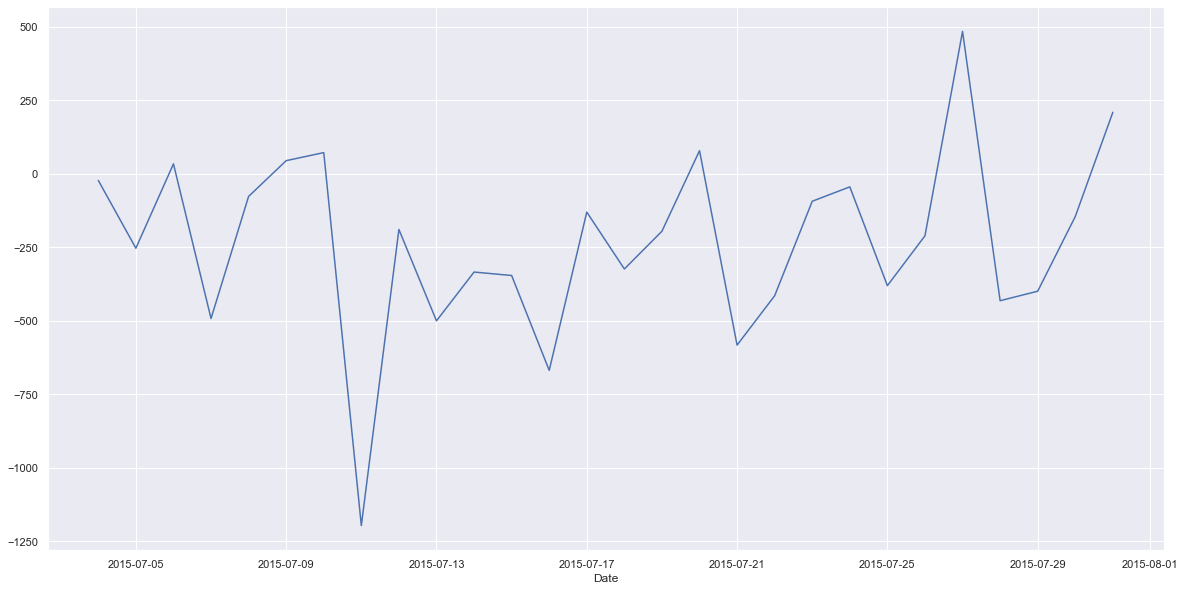

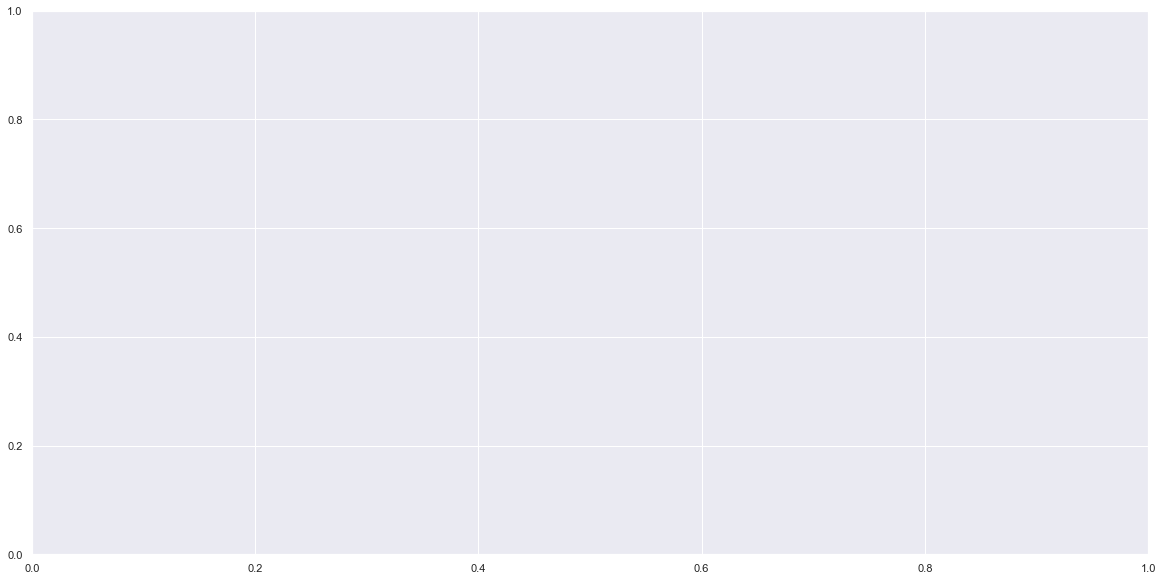

In [24]:
from sklearn.metrics import mean_absolute_error

display(forecast.get_params())

display(prediction)
display(y_test)

display(mean_absolute_error(y_test['Sales'], prediction))

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

residuals = y_test['Sales'] - prediction

sns.lineplot(data = residuals)
plt.show
plot_pacf(residuals.dropna(), zero = False)
plt.show()
sns.histplot(residuals)
plt.show()